# **La Laguna**

# **1. Librerías a utilizar.**



In [ ]:
!pip install mapclassify
!pip install libpysal
!pip install geopandas

     |████████████████████████████████| 2.4MB 5.3MB/s 


In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import mapclassify
import pandas as pd
import libpysal as ps
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!pip install contextily

     |████████████████████████████████| 19.1MB 1.4MB/s 


In [ ]:
import matplotlib.patches as mpatches
import contextily as ctx

# **2. Importar las bases de datos, para revisar coordenadas y los datos que contienen.**

In [ ]:
AGEBS= gpd.read_file('/content/drive/MyDrive/PROYECTO/Datos/La Laguna/zona_metur_Laguna.shp')
print ('Forma de los datos:',AGEBS.shape)
AGEBS.head(5)

Forma de los datos: (779, 8)


CVEGEO  ...                                           geometry
0  100120001058A  ...  POLYGON ((2349276.918 1501510.224, 2349328.557...
1  1001200011959  ...  POLYGON ((2345020.857 1501172.391, 2344997.557...
2  1001200012092  ...  POLYGON ((2344725.331 1501223.723, 2344718.970...
3  1001200010594  ...  POLYGON ((2349774.558 1500874.328, 2349768.993...
4  1001200281342  ...  POLYGON ((2357906.195 1484689.549, 2357855.966...

[5 rows x 8 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
AGEBS.crs

<Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

##**Áreas verdes Inegi (2020)**




In [ ]:
Area_Verde= gpd.read_file('/content/drive/MyDrive/PROYECTO/Datos/La Laguna/areas_verdes_Laguna.shp')
Area_Verde.head()

CVEGEO  ...                                           geometry
0  050090001  ...  POLYGON ((2372642.567 1525568.093, 2372641.363...
1  050090001  ...  POLYGON ((2372747.594 1525637.077, 2372746.985...
2  050090001  ...  POLYGON ((2372482.528 1524680.953, 2372480.808...
3  050090001  ...  POLYGON ((2372401.854 1524497.429, 2372397.280...
4  050090001  ...  POLYGON ((2372415.587 1524482.116, 2372396.970...

[5 rows x 13 columns]

In [ ]:
Area_Verde.crs

<Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

##**Datos Pobreza**

In [ ]:
Pobreza_ageb = pd.read_csv ('/content/drive/MyDrive/PROYECTO/Datos/La Laguna/Laguna.csv')
Pobreza_ageb.head(5)

cve_ent               nom_ent  cve_mun  ... cve_ageb   pobreza pobreza_ext
0      5.0  Coahuila de Zaragoza   5002.0  ...     1468  [ 0, 18]    [ 0, 20]
1      5.0  Coahuila de Zaragoza   5002.0  ...     1557  [ 0, 18]    [ 0, 20]
2      5.0  Coahuila de Zaragoza   5002.0  ...     1561  (18, 34]    [ 0, 20]
3      5.0  Coahuila de Zaragoza   5002.0  ...     1580  (18, 34]    [ 0, 20]
4      5.0  Coahuila de Zaragoza   5002.0  ...     1595  (18, 34]    [ 0, 20]

[5 rows x 8 columns]

#**3. Homologar bases de datos**

In [ ]:
AGEBS= AGEBS.rename({'CVEGEO':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'cvegeo':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'pobreza':'Rango_Pobreza'}, axis=1)
Pobreza_ageb= Pobreza_ageb.rename({'pobreza_ext':'Rango_PExtrema'}, axis=1)

In [ ]:
Pobreza_ageb=Pobreza_ageb.dropna()

In [ ]:
Pobreza_ageb['Min_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('(\d+)').astype(int)
Pobreza_ageb['Max_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('( \d+)').astype(int)
Pobreza_ageb['Pobre_AV'] = ((Pobreza_ageb['Min_RP'] + Pobreza_ageb['Max_RP']) / 2)
Pobreza_ageb2 = Pobreza_ageb[['Clave_AGEB','nom_mun', 'Rango_Pobreza', 'Pobre_AV' ]]

In [ ]:
Pobreza_ageb2.set_index('Clave_AGEB')
AGEBS.set_index('Clave_AGEB')

CVE_ENT  ...                                           geometry
Clave_AGEB             ...                                                   
100120001058A      10  ...  POLYGON ((2349276.918 1501510.224, 2349328.557...
1001200011959      10  ...  POLYGON ((2345020.857 1501172.391, 2344997.557...
1001200012092      10  ...  POLYGON ((2344725.331 1501223.723, 2344718.970...
1001200010594      10  ...  POLYGON ((2349774.558 1500874.328, 2349768.993...
1001200281342      10  ...  POLYGON ((2357906.195 1484689.549, 2357855.966...
...               ...  ...                                                ...
0503500014355      05  ...  POLYGON ((2363876.318 1500855.760, 2363955.562...
0503500010028      05  ...  POLYGON ((2363778.499 1503152.016, 2363808.997...
0503500014694      05  ...  POLYGON ((2362814.830 1504363.512, 2362871.701...
050350001468A      05  ...  POLYGON ((2364531.670 1505208.217, 2364715.743...
0503501783709      05  ...  POLYGON ((2369625.910 1504827.145, 2369613.211...

[779 rows x 7 columns]

In [ ]:
Pobreza_AGEB = AGEBS.merge(Pobreza_ageb2 ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')
Pobreza_A = Pobreza_AGEB.copy()
print ('Forma de los datos:',Pobreza_AGEB.shape)
Pobreza_AGEB.head()

Forma de los datos: (779, 11)


Clave_AGEB CVE_ENT CVE_MUN  ... nom_mun Rango_Pobreza Pobre_AV
0  100120001058A      10     012  ...   Lerdo      [ 0, 18]      0.0
1  1001200011959      10     012  ...   Lerdo      (50, 70]     60.0
2  1001200012092      10     012  ...   Lerdo      (50, 70]     60.0
3  1001200010594      10     012  ...   Lerdo      (18, 34]     26.0
4  1001200281342      10     012  ...     NaN           NaN      NaN

[5 rows x 11 columns]

In [ ]:
Pobreza_A = Pobreza_A.fillna(0)
Pobreza_A.head()

Clave_AGEB CVE_ENT CVE_MUN  ... nom_mun Rango_Pobreza Pobre_AV
0  100120001058A      10     012  ...   Lerdo      [ 0, 18]      0.0
1  1001200011959      10     012  ...   Lerdo      (50, 70]     60.0
2  1001200012092      10     012  ...   Lerdo      (50, 70]     60.0
3  1001200010594      10     012  ...   Lerdo      (18, 34]     26.0
4  1001200281342      10     012  ...       0             0      0.0

[5 rows x 11 columns]

In [ ]:
Pobreza_AGEB = Pobreza_AGEB.dropna()

In [ ]:
Pobreza_A.crs

<Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
Pobreza_A=Pobreza_A.to_crs(epsg=3857)

In [ ]:
mapclassify.NaturalBreaks(Pobreza_A['Pobre_AV'].values, k=5)

NaturalBreaks         

   Interval      Count
----------------------
[ 0.00,  0.00] |   296
( 0.00, 26.00] |   191
(26.00, 42.00] |   200
(42.00, 60.00] |    79
(60.00, 85.00] |    13

##**Mapa de pobreza por agebs**

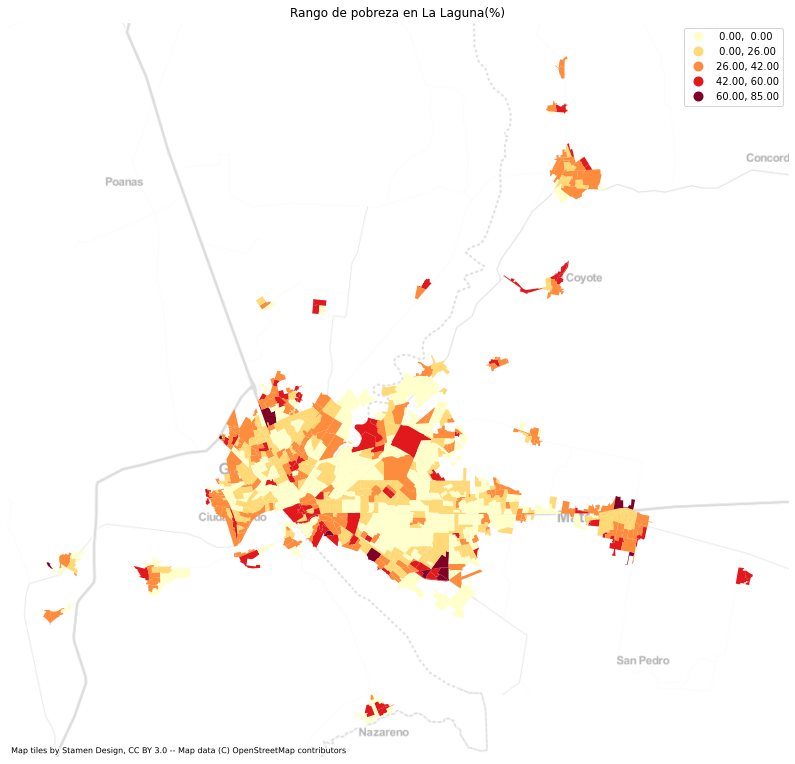

In [ ]:
fig, ax = plt.subplots(1,figsize=(14, 16)) 
Base = Pobreza_A.plot(column='Pobre_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de pobreza en La Laguna(%)")
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3) 
plt.show()

In [ ]:
Pobreza_AGEB=Pobreza_AGEB.to_crs(epsg=3857)

##**Mapa de pobreza con agebs de 2015**

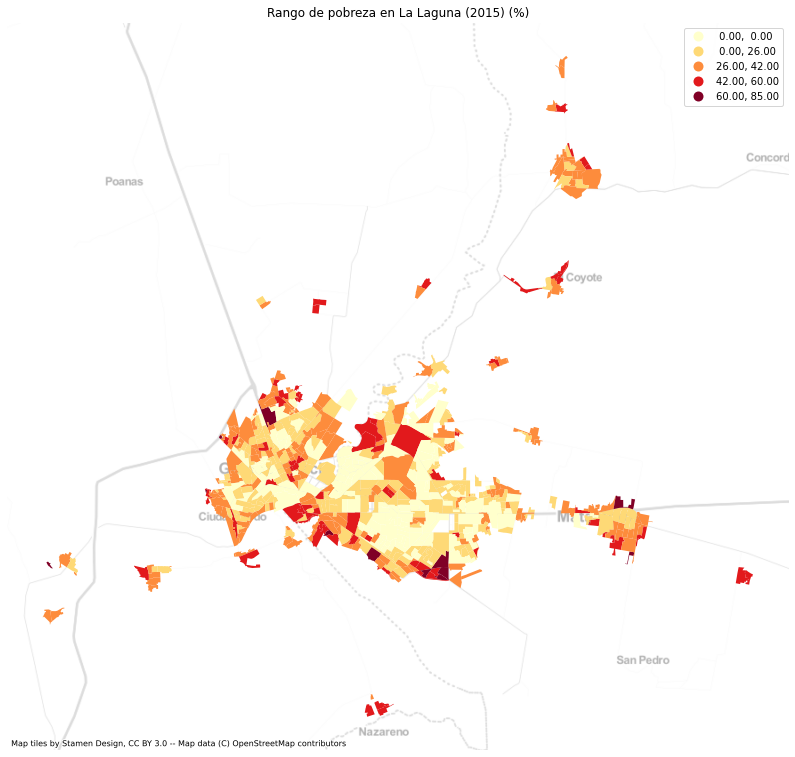

In [ ]:
fig, ax = plt.subplots(1,figsize=(14, 16)) 
Base = Pobreza_AGEB.plot(column='Pobre_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de pobreza en La Laguna (2015) (%)")
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3) 
plt.show()

Importar OSM, para comparar las áreas verdes INEGI v.s. OSM

In [ ]:
!pip install osmnx
import osmnx as ox

##**4. Descargar áreas verdes de OSM**

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-99fi0n4t
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-99fi0n4t
  Created wheel for geopandas: filename=geopandas-0.9.0+24.ga26bde2-py2.py3-none-any.whl size=995296 sha256=d9e21fd49d9deb101ea6ad00dc5d35ba927996b4a3e2d136249546cc5fe16a9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-mu2xx0yg/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


##**Todas las áreas verdes (sin discriminar a solamente parques)**

In [ ]:
tags = {'leisure': True}
AreaV = ox.geometries_from_place('Torreón', tags)
AreaV.head(10)

nodes  ... type
element_type osmid                                                          ...     
way          521925630   [5084671293, 5084671292, 5084671291, 508467129...  ...  NaN
node         2507673104                                                NaN  ...  NaN
             3344929735                                                NaN  ...  NaN
             3778877748                                                NaN  ...  NaN
             3778877755                                                NaN  ...  NaN
             5334030647                                                NaN  ...  NaN
             5408601572                                                NaN  ...  NaN
             5408634327                                                NaN  ...  NaN
             6582382819                                                NaN  ...  NaN
way          31261467    [347599620, 347599622, 347599623, 347599625, 3...  ...  NaN

[10 rows x 34 columns]

In [ ]:
tags = {'leisure': True}
AreaV1 = ox.geometries_from_place('Gómez Palacio', tags)
AreaV1.head(10)

geometry  ... type
element_type osmid                                                          ...     
node         6174109792                        POINT (-103.51606 25.58648)  ...  NaN
             6174109794                        POINT (-103.51675 25.58622)  ...  NaN
             6174109802                        POINT (-103.51596 25.58055)  ...  NaN
             6174147207                        POINT (-103.51638 25.58644)  ...  NaN
             6174147208                        POINT (-103.51631 25.58618)  ...  NaN
             6174147209                        POINT (-103.51598 25.58587)  ...  NaN
             6175284022                        POINT (-103.50355 25.58567)  ...  NaN
             8350593596                        POINT (-103.50112 25.59533)  ...  NaN
             8350747122                        POINT (-103.50167 25.59514)  ...  NaN
way          152504239   POLYGON ((-103.50033 25.56826, -103.49997 25.5...  ...  NaN

[10 rows x 22 columns]

In [ ]:
tags = {'leisure': True}
AreaV2 = ox.geometries_from_place('Lerdo', tags)
AreaV2.head(10)

geometry  ... type
element_type osmid                                                          ...     
node         5473927708                        POINT (-103.62214 25.50206)  ...  NaN
way          69020674    POLYGON ((-103.52457 25.53694, -103.52480 25.5...  ...  NaN
             153027318   POLYGON ((-103.51822 25.54580, -103.51819 25.5...  ...  NaN
             153027747   POLYGON ((-103.52571 25.53997, -103.52485 25.5...  ...  NaN
             153028252   POLYGON ((-103.54773 25.51243, -103.54778 25.5...  ...  NaN
             173958139   POLYGON ((-103.52909 25.51621, -103.52809 25.5...  ...  NaN
             268050039   POLYGON ((-103.59630 25.49638, -103.59559 25.4...  ...  NaN
             274473014   POLYGON ((-103.52534 25.54357, -103.52541 25.5...  ...  NaN
             322431001   POLYGON ((-103.48602 25.32431, -103.48603 25.3...  ...  NaN
             371928251   POLYGON ((-103.69181 25.49286, -103.69158 25.4...  ...  NaN

[10 rows x 17 columns]

In [ ]:
tags = {'leisure': True}
AreaV3 = ox.geometries_from_place('Matamoros', tags)
AreaV3.head(10)

leisure  ... description
element_type osmid                      ...            
node         1604304095  sports_centre  ...         NaN
             1608158835  sports_centre  ...         NaN
             3219436366           park  ...         NaN
             7727306848     playground  ...         NaN
way          147216738            park  ...         NaN
             147219064   sports_centre  ...         NaN
             147498918   sports_centre  ...         NaN
             147611652           pitch  ...         NaN
             147611822   sports_centre  ...         NaN
             147611827   sports_centre  ...         NaN

[10 rows x 10 columns]

In [ ]:
tags = {'leisure': True}
AreaV4 = ox.geometries_from_place('Francisco I. Madero', tags)
AreaV4.head(10)

geometry  ... building
element_type osmid                                                         ...         
way          388100905  POLYGON ((-99.06447 20.21416, -99.06385 20.214...  ...      NaN
             388100906  POLYGON ((-99.08253 20.23863, -99.08198 20.238...  ...      NaN
             388102331  POLYGON ((-99.07659 20.24950, -99.07574 20.249...  ...      NaN
             388103430  POLYGON ((-99.09471 20.23689, -99.09429 20.236...  ...      NaN
             388108362  POLYGON ((-99.05150 20.21774, -99.05093 20.217...  ...      NaN
             388108363  POLYGON ((-99.09966 20.22230, -99.09882 20.222...  ...      NaN
             706808091  POLYGON ((-99.11033 20.24559, -99.11033 20.245...  ...      NaN
             706823505  POLYGON ((-99.08933 20.24530, -99.08956 20.245...  ...      NaN
             706961498  POLYGON ((-99.08901 20.24445, -99.08902 20.244...  ...      NaN
             706965558  POLYGON ((-99.08782 20.24386, -99.08774 20.244...  ...      NaN

[10 rows x 6 columns]

##**Solamente parques**

In [ ]:
Parque= AreaV.drop(AreaV[AreaV['leisure']!='park'].index)
Parque1= AreaV1.drop(AreaV1[AreaV1['leisure']!='park'].index)
Parque2= AreaV2.drop(AreaV2[AreaV2['leisure']!='park'].index)
Parque3= AreaV3.drop(AreaV3[AreaV3['leisure']!='park'].index)
Parque4= AreaV4.drop(AreaV4[AreaV4['leisure']!='park'].index)

In [ ]:
Parque.head()

nodes  ... type
element_type osmid                                                        ...     
way          31261467  [347599620, 347599622, 347599623, 347599625, 3...  ...  NaN
             31744714  [355245852, 355245853, 6275182396, 355245854, ...  ...  NaN
             48113589  [611523911, 611523912, 611523913, 611523915, 6...  ...  NaN
             50843901  [5739991496, 5739991491, 5739991493, 573999148...  ...  NaN
             50938983  [649567649, 649567652, 649567654, 649567657, 6...  ...  NaN

[5 rows x 34 columns]

In [ ]:
Parque.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
frames = [Parque, Parque1, Parque2, Parque3, Parque4]

In [ ]:
Parques=pd.concat(frames)

In [ ]:
Parques.shape

(780, 39)

In [ ]:
Parques=Parques.to_crs(epsg=6372)
Parques.head()
AGEBS=AGEBS.to_crs(epsg=6372)

##**Parques de INEGI**

In [ ]:
colors = ['#A1E2E6', '#E6BDA1', '#B3A16B', '#678072', '#524A4A']

In [ ]:
Parque_Inegi = gpd.clip(Area_Verde, AGEBS)
Parque_Inegi.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...
Right CRS: EPSG:6372

  """Entry point for launching an IPython kernel.


CVEGEO  ...                                           geometry
0  050090001  ...  POLYGON ((2372642.567 1525568.093, 2372641.363...
1  050090001  ...  POLYGON ((2372747.594 1525637.077, 2372746.985...
2  050090001  ...  POLYGON ((2372482.528 1524680.953, 2372480.808...
3  050090001  ...  POLYGON ((2372401.854 1524497.429, 2372397.280...
4  050090001  ...  POLYGON ((2372415.587 1524482.116, 2372396.970...

[5 rows x 13 columns]

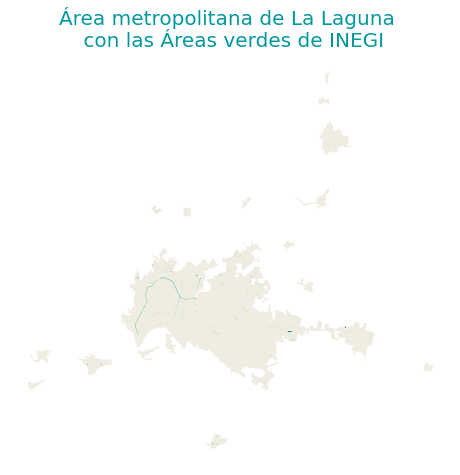

In [ ]:
Parques_Juarez= AGEBS.plot(color= colors[2], alpha=.2, figsize=(8,15))
Parque_Inegi.plot(ax=Parques_Juarez, color= '#039e7d',linewidth= 1.5)
plt.title("Área metropolitana de La Laguna \n con las Áreas verdes de INEGI", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
Parque_Clip = gpd.clip(Parques, AGEBS)
Parque_Clip.head()

nodes  ... barrier
element_type osmid                                                        ...        
way          31261467  [347599620, 347599622, 347599623, 347599625, 3...  ...     NaN
             31744714  [355245852, 355245853, 6275182396, 355245854, ...  ...     NaN
             48113589  [611523911, 611523912, 611523913, 611523915, 6...  ...     NaN
             50843901  [5739991496, 5739991491, 5739991493, 573999148...  ...     NaN
             50938983  [649567649, 649567652, 649567654, 649567657, 6...  ...     NaN

[5 rows x 39 columns]

##**Parques OSM**

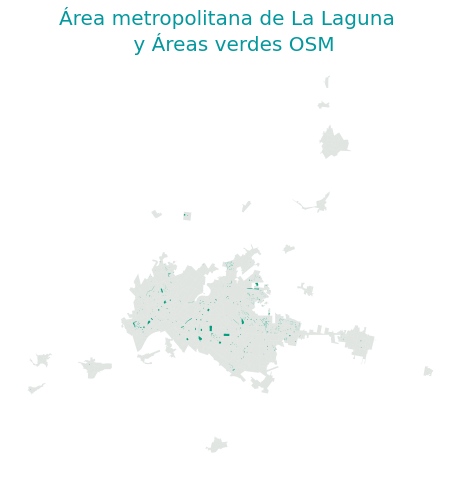

In [ ]:
Parques_Jz_OSM= AGEBS.plot(color=colors[3], alpha=0.2, figsize=(8,16))
Parque_Clip.plot(ax=Parques_Jz_OSM, color= '#039e7d')
plt.title("Área metropolitana de La Laguna \n y Áreas verdes OSM", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
AGEBS.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
Parque_Clip = gpd.clip(Parques, AGEBS)
Parque_Clip.head()

nodes  ... barrier
element_type osmid                                                        ...        
way          31261467  [347599620, 347599622, 347599623, 347599625, 3...  ...     NaN
             31744714  [355245852, 355245853, 6275182396, 355245854, ...  ...     NaN
             48113589  [611523911, 611523912, 611523913, 611523915, 6...  ...     NaN
             50843901  [5739991496, 5739991491, 5739991493, 573999148...  ...     NaN
             50938983  [649567649, 649567652, 649567654, 649567657, 6...  ...     NaN

[5 rows x 39 columns]

In [ ]:
Parque_Clips = gpd.clip(Area_Verde, AGEBS)
Parque_Clips.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...
Right CRS: EPSG:6372

  """Entry point for launching an IPython kernel.


CVEGEO  ...                                           geometry
0  050090001  ...  POLYGON ((2372642.567 1525568.093, 2372641.363...
1  050090001  ...  POLYGON ((2372747.594 1525637.077, 2372746.985...
2  050090001  ...  POLYGON ((2372482.528 1524680.953, 2372480.808...
3  050090001  ...  POLYGON ((2372401.854 1524497.429, 2372397.280...
4  050090001  ...  POLYGON ((2372415.587 1524482.116, 2372396.970...

[5 rows x 13 columns]

##**Parques OSM, solamente de la zona metropolitana**

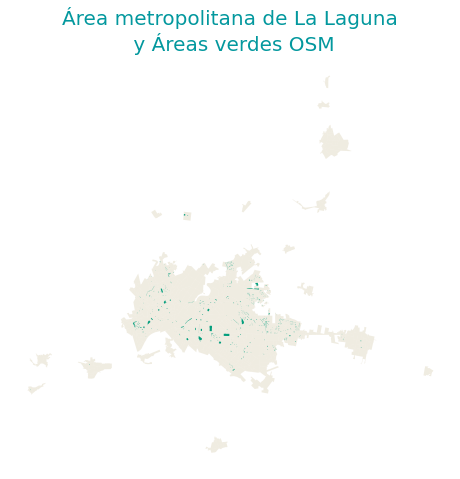

In [ ]:
Parques_Jz_OSM2= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(8,8))
Parque_Clip.plot(ax=Parques_Jz_OSM2, color='#039e7d')
plt.title("Área metropolitana de La Laguna\n y Áreas verdes OSM", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

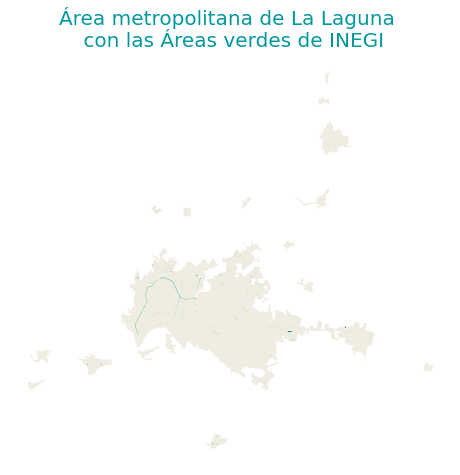

In [ ]:
Parques_Juarez= AGEBS.plot(color= colors[2], alpha=.2, figsize=(8,15))
Parque_Clips.plot(ax=Parques_Juarez, color= '#039e7d',linewidth= 1.5)
plt.title("Área metropolitana de La Laguna \n con las Áreas verdes de INEGI", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
AreaV.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
AreaV_INEGI=Parque_Clips.to_crs(epsg=3857)
AreaV_OSM=Parque_Clip.to_crs(epsg=3857)

## **Pobreza por ageb (Coneval, 2015)**

Parques Inegi y agebs clasificados por rango de pobreza

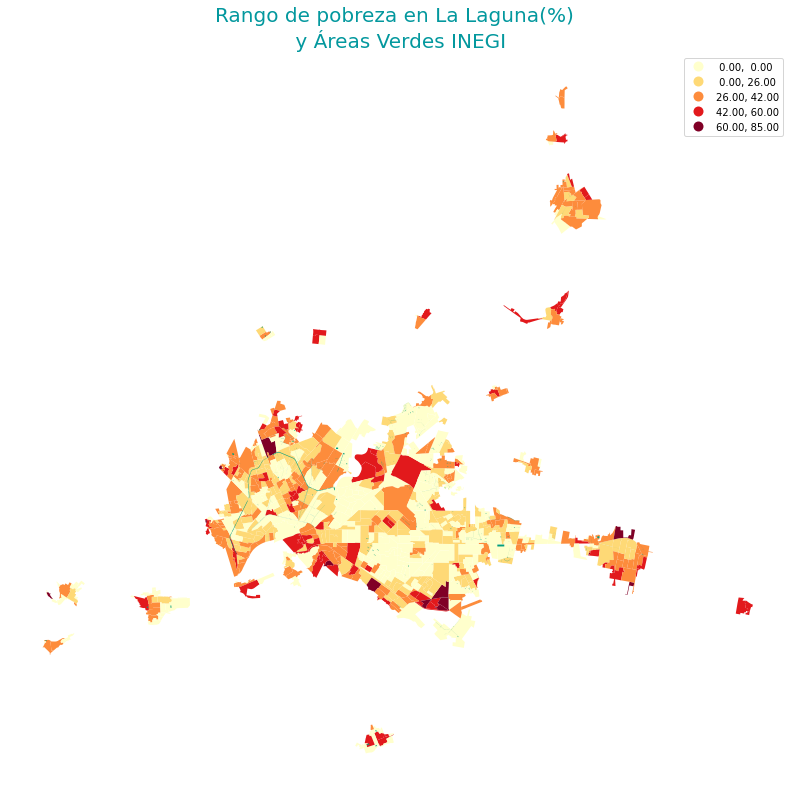

In [ ]:
fig, ax = plt.subplots(1,figsize=(14, 16)) 
Base = Pobreza_A.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_INEGI.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en La Laguna(%) \n y Áreas Verdes INEGI", fontsize=20, color = '#03989e')
ax.set_axis_off() 
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
plt.show()

##**Parques Inegi y agebs 2015 clasificados por rango de pobreza**

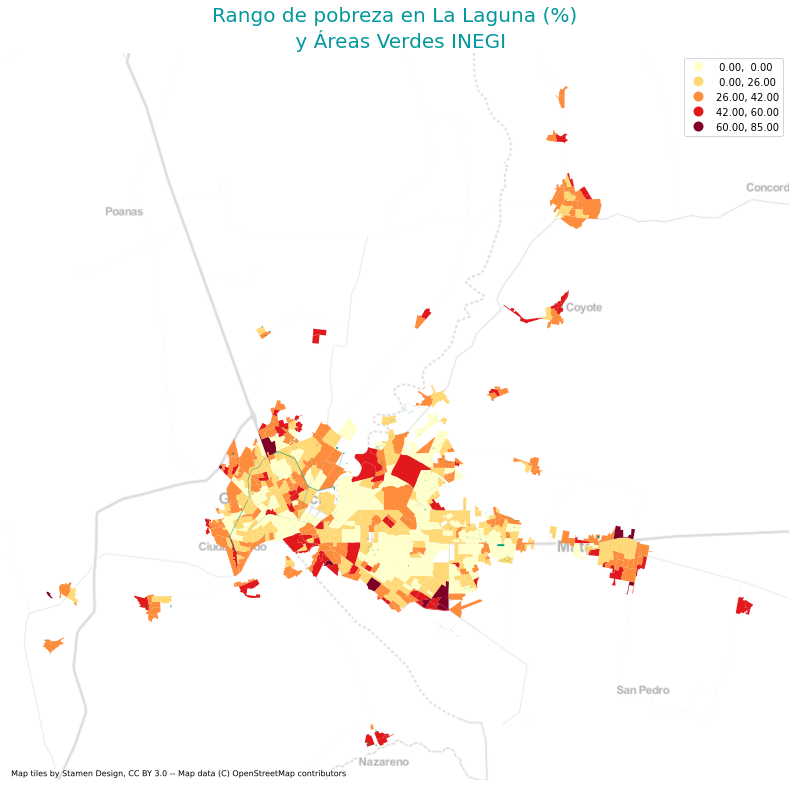

In [ ]:
fig, ax = plt.subplots(1,figsize=(14, 16)) 
Base = Pobreza_AGEB.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_INEGI.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en La Laguna (%) \n y Áreas Verdes INEGI", fontsize=20, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
plt.show()


#**Parques OSM y agebs clasificados por rango de pobreza**

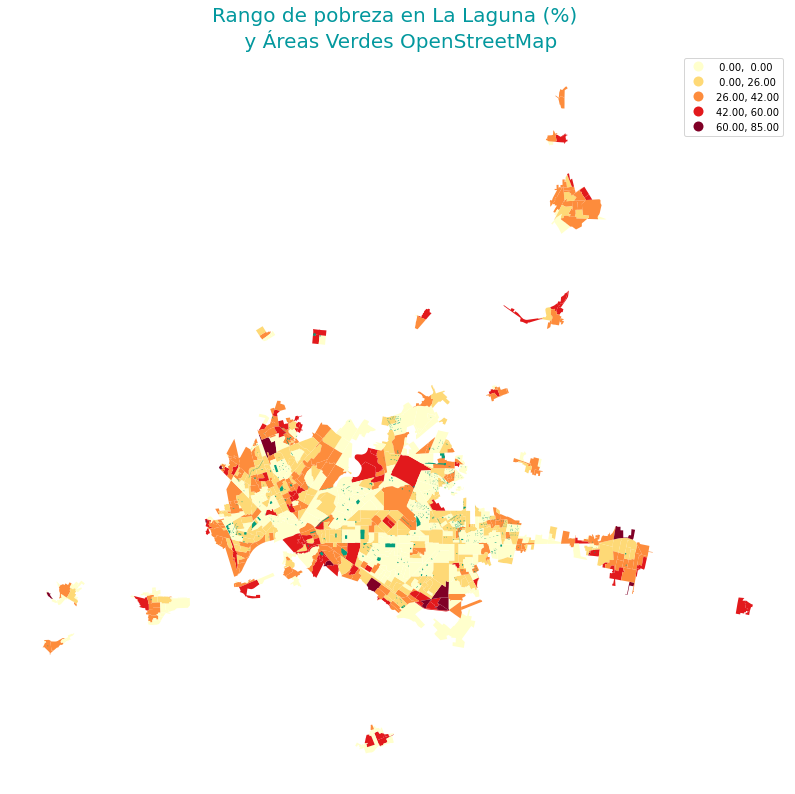

In [ ]:
fig, ax = plt.subplots(1,figsize=(14, 16)) 
Base = Pobreza_A.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_OSM.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en La Laguna (%) \n y Áreas Verdes OpenStreetMap", fontsize=20, color = '#03989e')
ax.set_axis_off() 
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
plt.show()


##**Parques OSM y agebs 2015 clasificados por rango de pobreza**

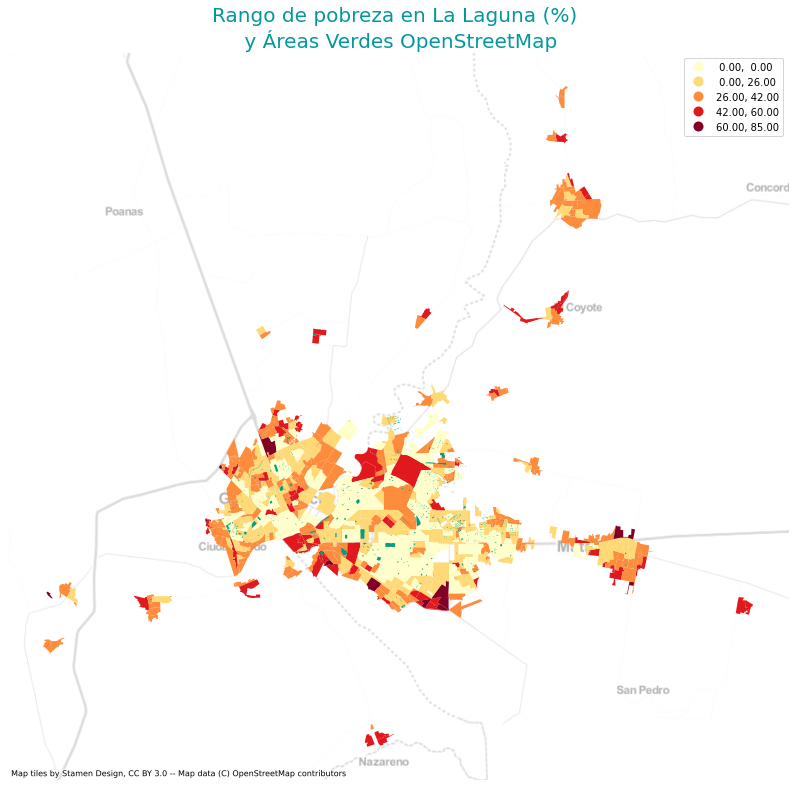

In [ ]:
fig, ax = plt.subplots(1,figsize=(14, 16)) 
Base = Pobreza_AGEB.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_OSM.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en La Laguna (%) \n y Áreas Verdes OpenStreetMap", fontsize=20, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
plt.show()

#**5. Cálculo de centroides de Agebs, Áreas Verdes de INEGI y Áreas Verdes de OSM**

In [ ]:
import warnings
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
!pip install access
from access import Access, weights, Datasets

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/access-1.1.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [ ]:
Centroide_AGEB1 = Pobreza_A.copy()
Centroide_AGEB1 = Centroide_AGEB1.reset_index()
Centroide_AGEB1 = Centroide_AGEB1[['Clave_AGEB', 'geometry', 'Pobre_AV']]
Centroide_AGEB1['geometry'] = Centroide_AGEB1.to_crs(6372).centroid
centroides = Centroide_AGEB1.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
Centroide_AGEB1['X_O']=coordenadas[:,0]/1000
Centroide_AGEB1['Y_O']=coordenadas[:,1]/1000
Centroide_AGEB1.head(2)

Clave_AGEB                         geometry  ...          X_O          Y_O
0  100120001058A  POINT (2349155.214 1501063.066)  ...  2349.155214  1501.063066
1  1001200011959  POINT (2344908.380 1501200.934)  ...  2344.908380  1501.200934

[2 rows x 5 columns]

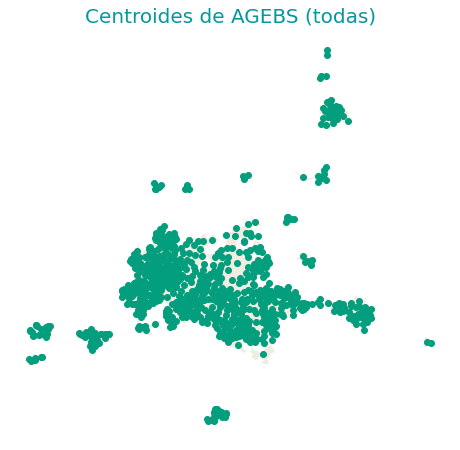

In [ ]:
AGEBS_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(8,8))
Centroide_AGEB1.plot(ax=AGEBS_centro, color='#039e7d')
plt.title("Centroides de AGEBS (todas)", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
Centroide_AGEB = Pobreza_AGEB.copy()
Centroide_AGEB = Centroide_AGEB.reset_index()
Centroide_AGEB = Centroide_AGEB[['Clave_AGEB', 'geometry', 'Pobre_AV']]
Centroide_AGEB['geometry'] = Centroide_AGEB.to_crs(6372).centroid
centroides = Centroide_AGEB.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
Centroide_AGEB['X_O']=coordenadas[:,0]/1000
Centroide_AGEB['Y_O']=coordenadas[:,1]/1000
Centroide_AGEB.head(2)

Clave_AGEB                         geometry  ...          X_O          Y_O
0  100120001058A  POINT (2349155.214 1501063.066)  ...  2349.155214  1501.063066
1  1001200011959  POINT (2344908.380 1501200.934)  ...  2344.908380  1501.200934

[2 rows x 5 columns]

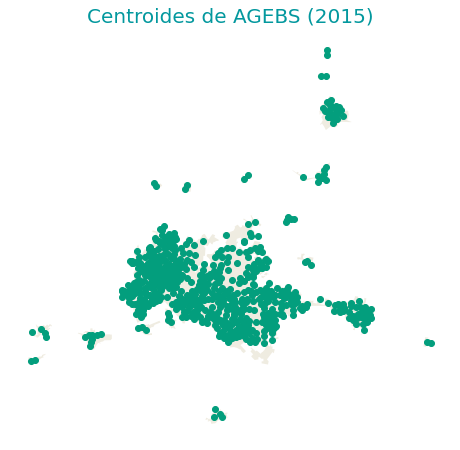

In [ ]:
AGEBS_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(8,8))
Centroide_AGEB.plot(ax=AGEBS_centro, color='#039e7d')
plt.title("Centroides de AGEBS (2015)", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
Centro_Area_Inegi = AreaV_INEGI.copy()
Centro_Area_Inegi = Centro_Area_Inegi.reset_index()
Centro_Area_Inegi = Centro_Area_Inegi[['CVEGEO', 'geometry', 'TIPO']]
Centro_Area_Inegi['geometry'] = Centro_Area_Inegi.to_crs(6372).centroid
centroides = Centro_Area_Inegi.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
Centro_Area_Inegi['X_D']=coordenadas[:,0]/1000
Centro_Area_Inegi['Y_D']=coordenadas[:,1]/1000
Centro_Area_Inegi.head(2)

CVEGEO                         geometry  ...          X_D          Y_D
0  050090001  POINT (2372681.958 1525594.979)  ...  2372.681958  1525.594979
1  050090001  POINT (2372800.644 1525673.084)  ...  2372.800644  1525.673084

[2 rows x 5 columns]

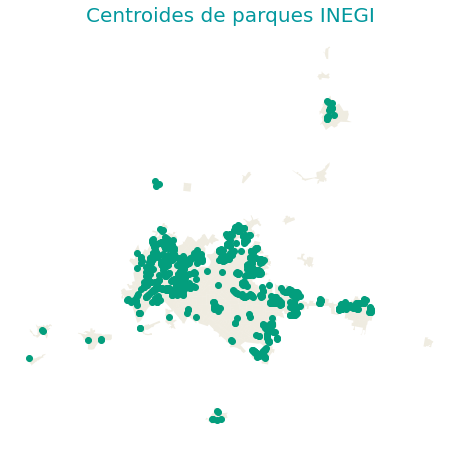

In [ ]:
INEGI_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(8,8))
Centro_Area_Inegi.plot(ax=INEGI_centro, color='#039e7d')
plt.title("Centroides de parques INEGI", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
OSM_Ce = AreaV_OSM.copy()
OSM_Ce['geometry'] = OSM_Ce.to_crs(6372).centroid
centroides = OSM_Ce.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
OSM_Ce['X_D']=coordenadas[:,0]/1000
OSM_Ce['Y_D']=coordenadas[:,1]/1000
OSM_Ce.head(2)

nodes  ...          Y_D
element_type osmid                                                        ...             
way          31261467  [347599620, 347599622, 347599623, 347599625, 3...  ...  1501.220381
             31744714  [355245852, 355245853, 6275182396, 355245854, ...  ...  1501.176582

[2 rows x 41 columns]

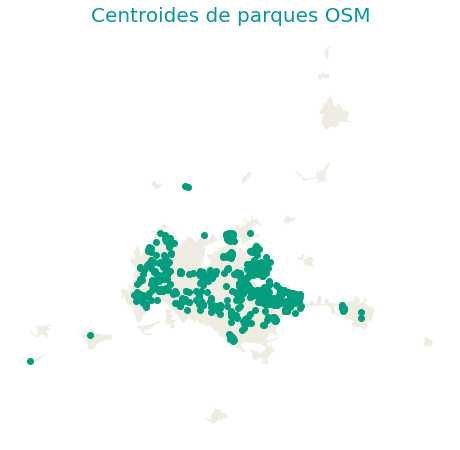

In [ ]:
OSM_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(8,8))
OSM_Ce.plot(ax=OSM_centro, color='#039e7d')
plt.title("Centroides de parques OSM", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

#**6. Cálculo de la distancia entre centroides de Agebs y centroides de áreas verdes (INEGI)**

In [ ]:
dist_matrix = (euclidean_distances(Centroide_AGEB[['Y_O','X_O']], 
                              Centro_Area_Inegi[['Y_D','X_D']]))

In [ ]:
df_dist_matrix = (pd.DataFrame(dist_matrix,index=Centroide_AGEB['Clave_AGEB'], 
                 columns=Centro_Area_Inegi['CVEGEO']))
df_dist_matrix.head(2)

CVEGEO         050090001  050090001  050090001  ...  100070001  100070001  100070001
Clave_AGEB                                      ...                                 
100120001058A  33.990035  34.128571  33.225968  ...   4.659261   4.661919   4.536040
1001200011959  36.965404  37.106125  36.245774  ...   5.687270   5.765774   5.609452

[2 rows x 1074 columns]

In [ ]:
df_dist_long = (pd.melt(df_dist_matrix.reset_index(),id_vars='Clave_AGEB'))
df_dist_long = df_dist_long.rename(columns={'value':'Distancia'})
Matriz_Dist_INEGI= df_dist_long.rename({'Clave_AGEB':'Origen','CVEGEO': 'Destino'}, axis=1)
Matriz_Dist_INEGI.head(2)

Origen    Destino  Distancia
0  100120001058A  050090001  33.990035
1  1001200011959  050090001  36.965404

In [ ]:
laguna= pd.DataFrame(Matriz_Dist_INEGI)
gini_laguna= laguna['Distancia'].mean()
print(gini_laguna)

12.382314961988422


#**7. Cálculo de la accesibilidad a áreas verdes (INEGI) con el Modelo Gravitacional**

In [ ]:
Spatial_Access_INEGI = Access(demand_df    = Centroide_AGEB, 
                              demand_index = 'Clave_AGEB', 
                              demand_value = 'Pobre_AV',
                              supply_df    = Centro_Area_Inegi, 
                              supply_index = 'CVEGEO',
                              cost_df      = Matriz_Dist_INEGI, 
                              cost_origin  = 'Origen', 
                              cost_dest    = 'Destino',
                              cost_name    = 'Distancia')

access INFO     :: Warning: A supply value was not provided, so a default
                             supply value of 1 was created in the column named "value".
                             Note that without a supply value, you cannot use any of the
                             floating catchment area methods.


In [ ]:
Model_grav = weights.gravity(scale = 1, alpha = -2, min_dist = 0.5)

Gravity_Weigh = Spatial_Access_INEGI.weighted_catchment(name = "Gravity", weight_fn = Model_grav)

MemoryError: Unable to allocate 2.46 GiB for an array with shape (330453548,) and data type int64

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Mariana\anaconda3\envs\geo_env\python.exe' 'C:\Users\Mariana\anaconda3\envs\geo_env\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\Mariana\AppData\Local\Temp\tmpqyvuz83y'
       cwd: C:\Users\Mariana\AppData\Local\Temp\pip-install-zchi01up\rasterio_6d3380d3053e485192d766b1c7a1ac08
  Complete output (2 lines):
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Mariana\anaconda3\envs\geo_env\python.exe' 'C:\Users\Mariana\anaconda3\envs\geo_env\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.p

  Using cached contextily-1.1.0-py3-none-any.whl (24 kB)
  Using cached rasterio-1.2.3.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.2.2.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.2.1.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.2.0.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Gett

     command: 'C:\Users\Mariana\anaconda3\envs\geo_env\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mariana\\AppData\\Local\\Temp\\pip-install-zchi01up\\rasterio_a792df077a044870b0cede6f804e2ab6\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mariana\\AppData\\Local\\Temp\\pip-install-zchi01up\\rasterio_a792df077a044870b0cede6f804e2ab6\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Mariana\AppData\Local\Temp\pip-pip-egg-info-ohraadn5'
         cwd: C:\Users\Mariana\AppData\Local\Temp\pip-install-zchi01up\rasterio_a792df077a044870b0cede6f804e2ab6\
    Complete output (2 lines):
    INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is avail


  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.1.0.tar.gz (2.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.0.28.tar.gz (2.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.0.27.tar.gz (2.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.0.26.tar.gz (2.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with statu

In [ ]:
Grav_value = Gravity_Weigh.copy().reset_index()
Spatial_Access_I= Pobreza_AGEB.merge(Grav_value ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')

In [ ]:
Pobreza_AGEB=Pobreza_AGEB.to_crs(epsg = 3857)
Pobreza_A=Pobreza_A.to_crs(epsg = 3857)
AreaV_INEGI=AreaV_INEGI.to_crs(epsg = 3857)
Spatial_Access_I=Spatial_Access_I.to_crs(epsg = 3857)

In [ ]:
Spatial_Access_I.head()

Clave_AGEB CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  \
0  0803700016434      08     037    0001     6434   
1  080370001770A      08     037    0001     770A   
2  0803700018360      08     037    0001     8360   
3  0803700018106      08     037    0001     8106   
4  0803700018500      08     037    0001     8500   

                                            geometry Municipio Rango_Pobreza  \
0  POLYGON ((-11861954.889 3732730.731, -11861991...    Juárez      (50, 70)   
1  POLYGON ((-11833580.381 3713641.441, -11833548...    Juárez      (18, 34)   
2  POLYGON ((-11862432.144 3712298.556, -11862782...    Juárez      (50, 70)   
3  POLYGON ((-11841035.315 3701855.536, -11840963...    Juárez      (34, 50)   
4  POLYGON ((-11863184.793 3713279.514, -11863214...    Juárez      (50, 70)   

   Pobre_AV  Gravity_value  
0      60.0     480.656544  
1      26.0    2487.380653  
2      60.0     416.099941  
3      42.0    4742.419706  
4      60.0     415.416879

In [ ]:
Spatial_Access_I.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 609 entries, 0 to 608
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Clave_AGEB     609 non-null    object  
 1   CVE_ENT        609 non-null    object  
 2   CVE_MUN        609 non-null    object  
 3   CVE_LOC        609 non-null    object  
 4   CVE_AGEB       609 non-null    object  
 5   geometry       609 non-null    geometry
 6   Municipio      609 non-null    object  
 7   Rango_Pobreza  609 non-null    object  
 8   Pobre_AV       609 non-null    float64 
 9   Gravity_value  609 non-null    float64 
dtypes: float64(2), geometry(1), object(7)
memory usage: 52.3+ KB


In [ ]:
Spatial_Access_I['Pobre_AV']= Spatial_Access_I.Pobre_AV.astype(int)

In [ ]:
Spatial_Access_I['Gravity_value']= Spatial_Access_I.Gravity_value.astype(int)

In [ ]:
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import seaborn as sns

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


##**8. Estandarización de variables**

In [ ]:
Spatial_Access_I['Std_Pobreza'] = (Spatial_Access_I['Pobre_AV'] - Spatial_Access_I['Pobre_AV'].mean()) / Spatial_Access_I['Pobre_AV'].std()

In [ ]:
Spatial_Access_I['Std_Access'] = (Spatial_Access_I['Gravity_value'] - Spatial_Access_I['Gravity_value'].mean()) / Spatial_Access_I['Gravity_value'].std()

##**Diagramas para ver la relación entre la pobreza y la accesibilidad a áreas verdes (INEGI)**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:177: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, np.float)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anac

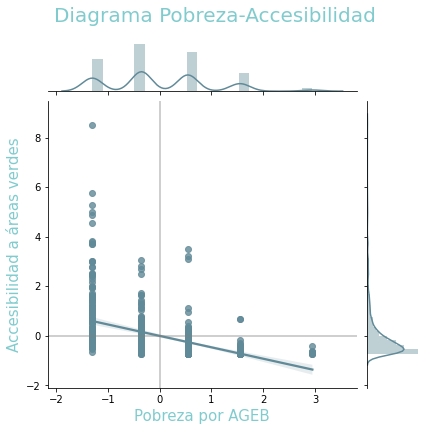

In [ ]:
h=sns.jointplot(data=Spatial_Access_I, x = Spatial_Access_I['Std_Pobreza'], y = Spatial_Access_I['Std_Access'],color = '#618A98', kind = 'reg')
h.fig.suptitle("Diagrama Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
h.set_axis_labels('Pobreza por AGEB','Accesibilidad a áreas verdes',fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
h.fig.subplots_adjust(top=0.90)
plt.show()

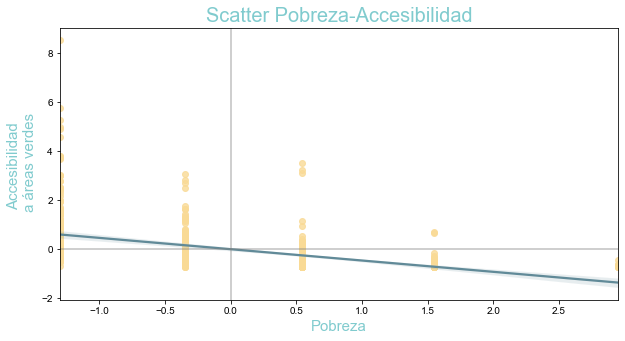

In [ ]:
plt.subplots(1,figsize=(10,5))
ax= sns.regplot(data=Spatial_Access_I, x = Spatial_Access_I['Std_Pobreza'], y = Spatial_Access_I['Std_Access'],scatter_kws={"color": "#F9DA95"}, line_kws={"color": "#618A98"})
sns.set_style('ticks')
ax.axes.set_title("Scatter Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
ax.set_xlabel("Pobreza",fontsize=15, alpha = 0.5, color='#03989e')
ax.set_ylabel("Accesibilidad \n a áreas verdes",fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b,

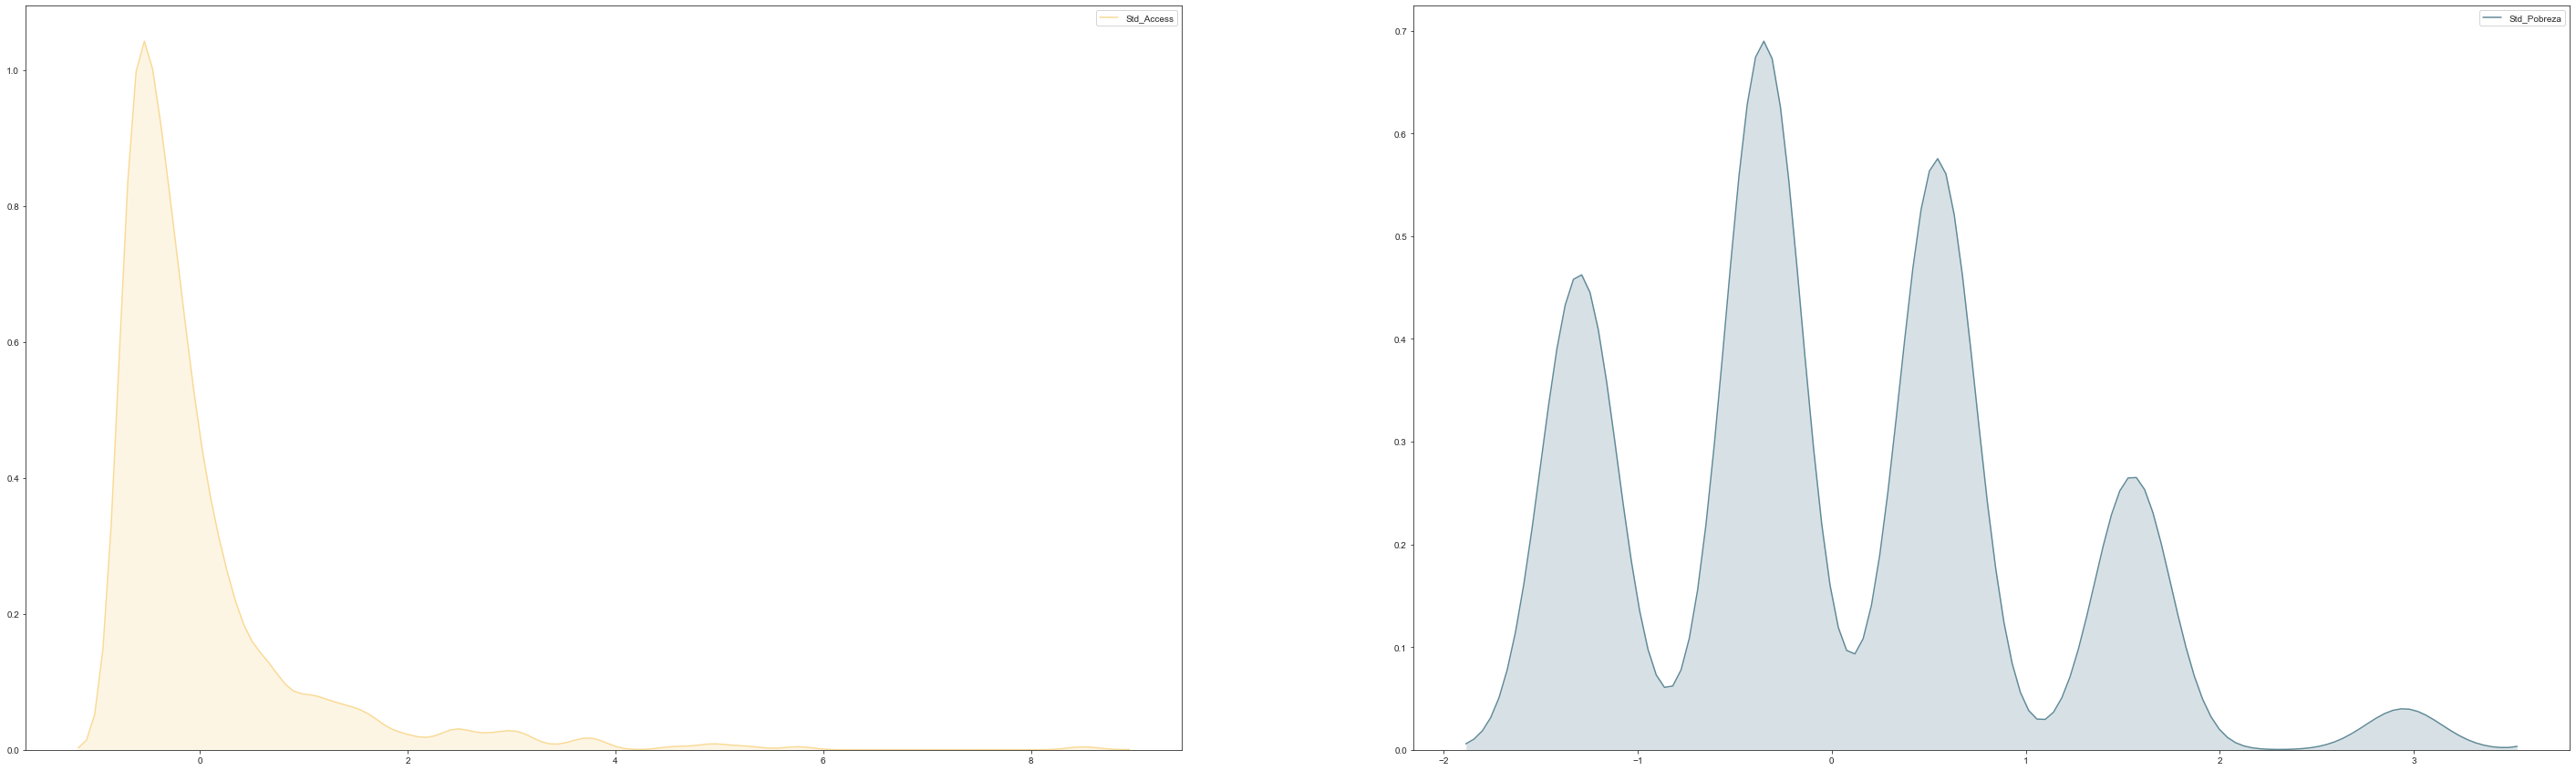

In [ ]:
fig , filas = plt.subplots(1,2, figsize=(50,15))
for ax in filas: 
    if (ax==filas[0]):
        sns.kdeplot(Spatial_Access_I['Std_Access'], shade = True, color= "#F9DA95", ax=ax)
    elif (ax==filas[1]):
        sns.kdeplot(Spatial_Access_I['Std_Pobreza'], shade = True, color= "#618A98", ax=ax)

##**Mapa de accesibilidad a áreas verdes (INEGI)**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairw

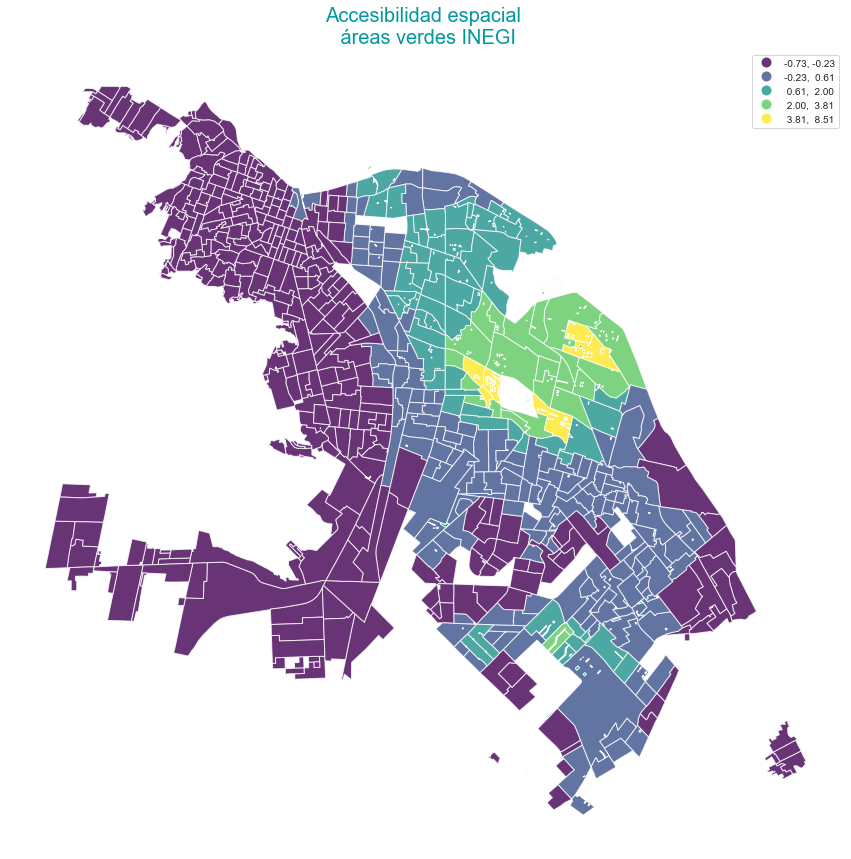

In [ ]:
Base = Spatial_Access_I.plot(column='Std_Access', 
              alpha=0.8, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='viridis',
              classification_kwds={'k':5},
              figsize=(15,15))
AreaV_INEGI.plot(ax=Base, color='#00B464')
plt.title("Accesibilidad espacial \n áreas verdes INEGI", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

#**9. Cálculo de la distancia entre centroides de Agebs y centroides de áreas verdes (OSM)**

In [ ]:
dist_matrix2 = (euclidean_distances(Centroide_AGEB[['Y_O','X_O']], 
                              OSM_Ce[['Y_D','X_D']]))

In [ ]:
df_dist_matrix2 = (pd.DataFrame(dist_matrix2,index=Centroide_AGEB['Clave_AGEB'], 
                 columns=OSM_Ce.index))
df_dist_matrix2.head(2)

element_type        way                        ...                         relation
osmid         31261467   31744714   48113589   ...  921158082  921808102  8446711  
Clave_AGEB                                     ...                                 
100120001058A  5.615027   6.216154   8.443529  ...  14.469838  12.824606  11.258976
1001200011959  9.859675  10.461979  12.544296  ...  18.638724  16.957674  15.508017

[2 rows x 600 columns]

In [ ]:
df_dist_long2 = (pd.melt(df_dist_matrix2.reset_index(),id_vars='Clave_AGEB'))
df_dist_long2 = df_dist_long2.rename(columns={'value':'Distancia'})
Matriz_Dist2= df_dist_long2.rename({'Clave_AGEB':'Origen','osmid': 'Destino'}, axis=1)
Matriz_Dist2.head(2)

Origen element_type   Destino  Distancia
0  100120001058A          way  31261467   5.615027
1  1001200011959          way  31261467   9.859675

#**10. Cálculo de la accesibilidad a áreas verdes (OSM) con el Modelo Gravitacional**

In [ ]:
Spatial_Access_data2= Access(demand_df    = Centroide_AGEB, 
                              demand_index = 'Clave_AGEB', 
                              demand_value = 'Pobre_AV',
                              supply_df    = Matriz_Dist2, 
                              supply_index = 'Destino',
                              cost_df      = Matriz_Dist2, 
                              cost_origin  = 'Origen', 
                              cost_dest    = 'Destino',
                              cost_name    = 'Distancia')

access INFO     :: Warning: A supply value was not provided, so a default
                             supply value of 1 was created in the column named "value".
                             Note that without a supply value, you cannot use any of the
                             floating catchment area methods.


In [ ]:
Model_grav2 = weights.gravity(scale = 1, alpha = -2, min_dist = 0.5)

Gravity_Weigh2 = Spatial_Access_data2.weighted_catchment(name = "Gravity", weight_fn = Model_grav)

In [ ]:
Grav_value2 = Gravity_Weigh2.copy().reset_index()
Spatial_Access2 = Pobreza_AGEB.merge(Grav_value2 ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')

In [ ]:
Spatial_Access2.head()

Clave_AGEB CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  \
0  0803700016434      08     037    0001     6434   
1  080370001770A      08     037    0001     770A   
2  0803700018360      08     037    0001     8360   
3  0803700018106      08     037    0001     8106   
4  0803700018500      08     037    0001     8500   

                                            geometry Municipio Rango_Pobreza  \
0  POLYGON ((-11861954.889 3732730.731, -11861991...    Juárez      (50, 70)   
1  POLYGON ((-11833580.381 3713641.441, -11833548...    Juárez      (18, 34)   
2  POLYGON ((-11862432.144 3712298.556, -11862782...    Juárez      (50, 70)   
3  POLYGON ((-11841035.315 3701855.536, -11840963...    Juárez      (34, 50)   
4  POLYGON ((-11863184.793 3713279.514, -11863214...    Juárez      (50, 70)   

   Pobre_AV  Gravity_value  
0      60.0       4.156979  
1      26.0      23.778643  
2      60.0       3.233455  
3      42.0      19.681368  
4      60.0       3.231205

##**Mapa de accesibilidad a áreas verdes (OSM)**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairw

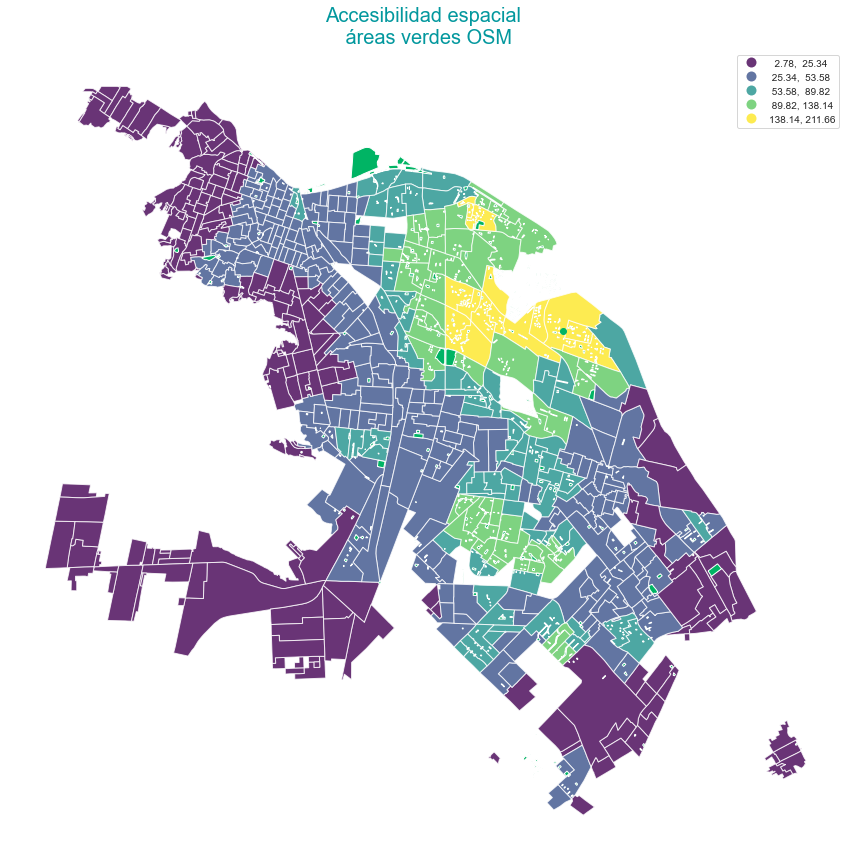

In [ ]:
Base = Spatial_Access2.plot(column='Gravity_value', 
              alpha=0.8, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='viridis',
              classification_kwds={'k':5},
              figsize=(15,15))
AreaV_OSM.plot(ax=Base, color='#00B464')
plt.title("Accesibilidad espacial \n áreas verdes OSM", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

##**11. Estandarización de variables**

In [ ]:
Spatial_Access2['Std_Pobreza'] = (Spatial_Access2['Pobre_AV'] - Spatial_Access2['Pobre_AV'].mean()) / Spatial_Access2['Pobre_AV'].std()

In [ ]:
Spatial_Access2['Std_Access'] = (Spatial_Access2['Gravity_value'] - Spatial_Access2['Gravity_value'].mean()) / Spatial_Access2['Gravity_value'].std()

##**Diagramas para ver la relación entre la pobreza y la accesibilidad a áreas verdes (OSM)**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:177: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, np.float)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anac

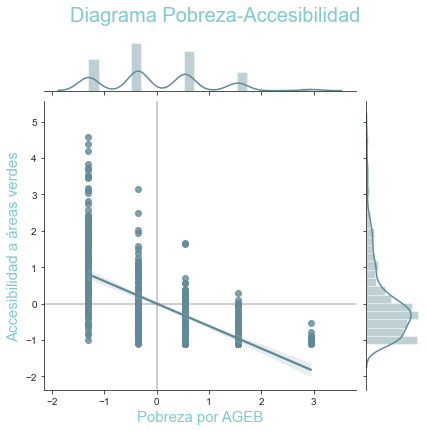

In [ ]:
h=sns.jointplot(data=Spatial_Access2, x = Spatial_Access2['Std_Pobreza'], y = Spatial_Access2['Std_Access'],color = '#618A98', kind = 'reg')
h.fig.suptitle("Diagrama Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
h.set_axis_labels('Pobreza por AGEB','Accesibilidad a áreas verdes',fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
h.fig.subplots_adjust(top=0.90)
plt.show()

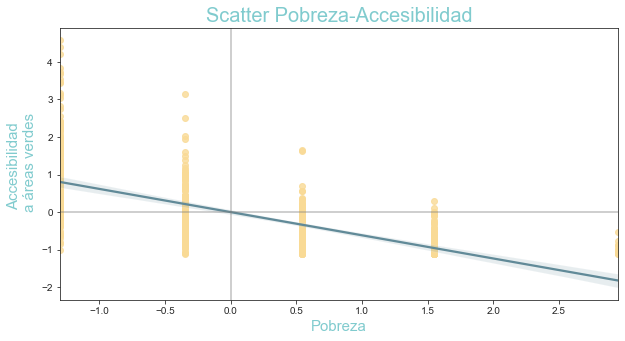

In [ ]:
plt.subplots(1,figsize=(10,5))
ax= sns.regplot(data=Spatial_Access2, x = Spatial_Access2['Std_Pobreza'], y = Spatial_Access2['Std_Access'],scatter_kws={"color": "#F9DA95"}, line_kws={"color": "#618A98"})
sns.set_style('ticks')
ax.axes.set_title("Scatter Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
ax.set_xlabel("Pobreza",fontsize=15, alpha = 0.5, color='#03989e')
ax.set_ylabel("Accesibilidad \n a áreas verdes",fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b,

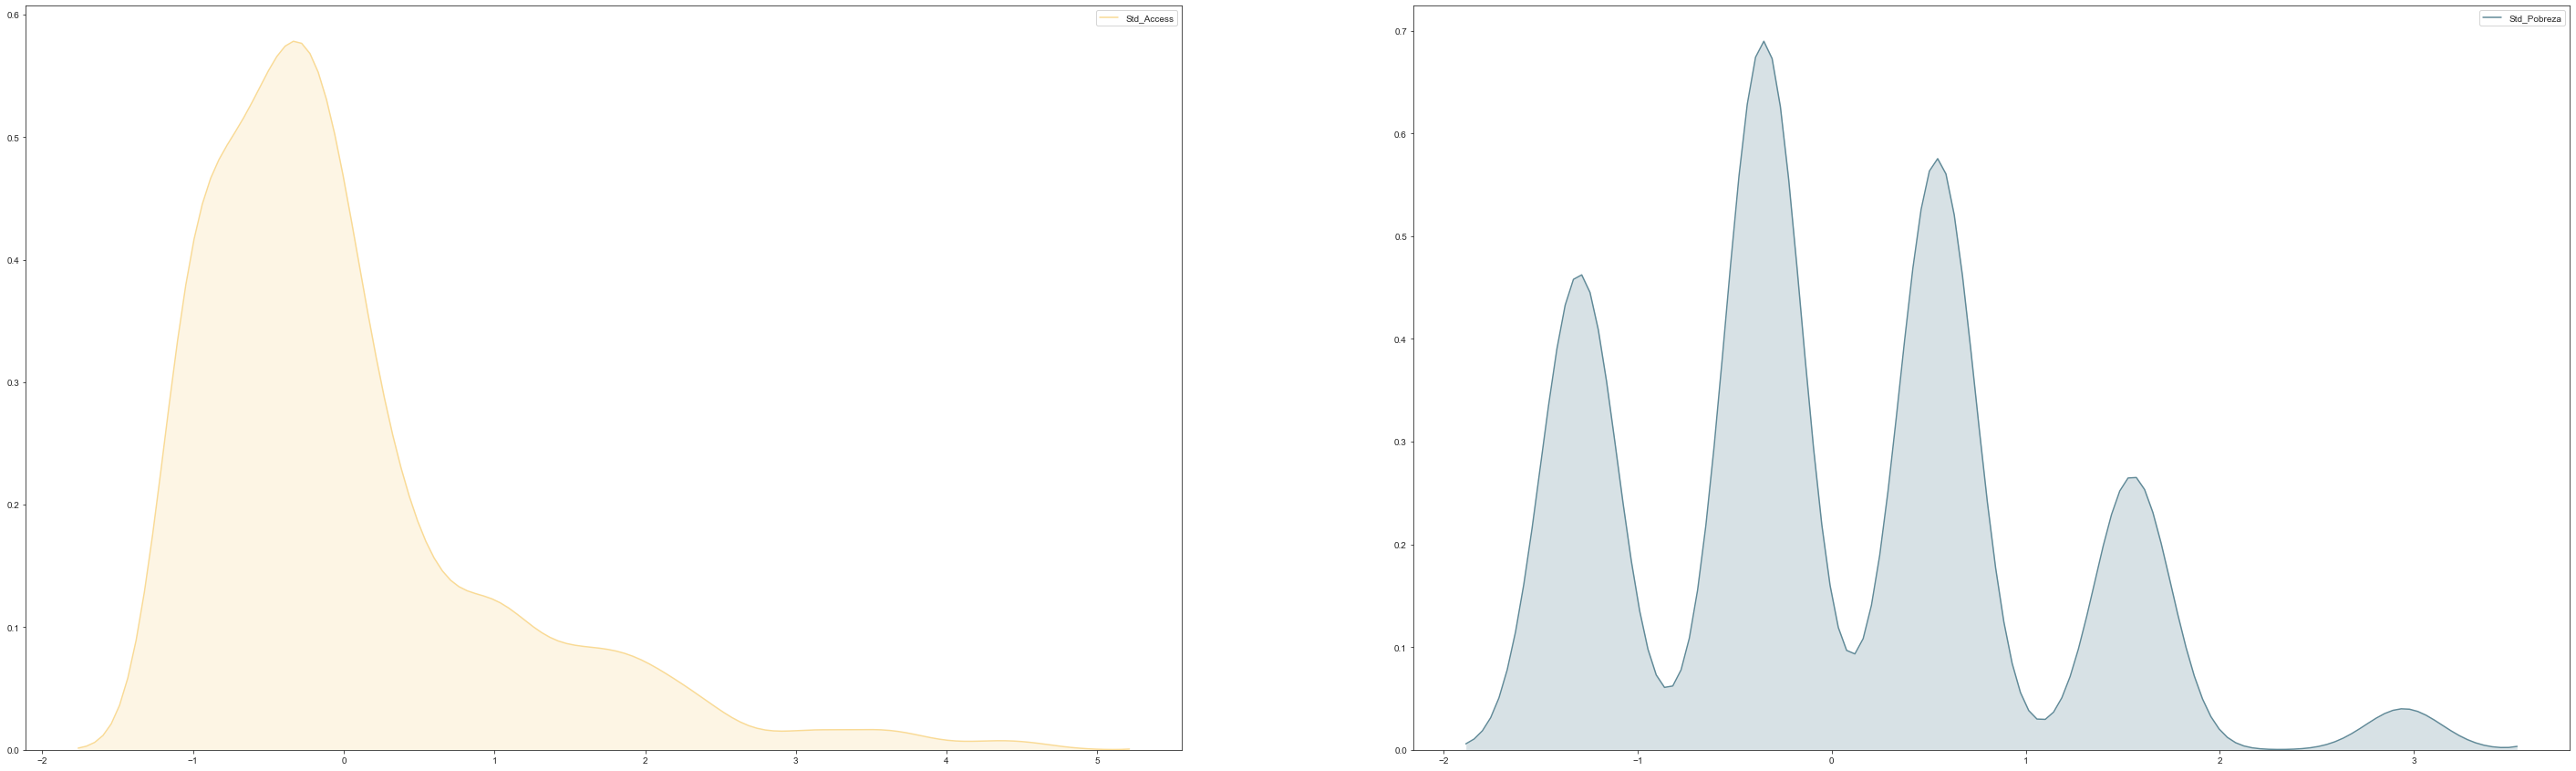

In [ ]:
fig , filas = plt.subplots(1,2, figsize=(50,15))
for ax in filas: 
    if (ax==filas[0]):
        sns.kdeplot(Spatial_Access2['Std_Access'], shade = True, color= "#F9DA95", ax=ax)
    elif (ax==filas[1]):
        sns.kdeplot(Spatial_Access2['Std_Pobreza'], shade = True, color= "#618A98", ax=ax)

In [ ]:
!pip install folium
import folium

In [ ]:
Spatial_Access2.to_file("Spatial_Access2.geojson", driver='GeoJSON')

In [ ]:
Spatial_Access_I.to_file("Spatial_Access_I.geojson", driver='GeoJSON')

In [ ]:
Area_Verde.to_file("Area_Verde.geojson", driver='GeoJSON')

In [ ]:
from folium import Choropleth

##**Mapa de accesibilidad y pobreza, con áreas verdes (INEGI)**

In [ ]:
#popup=Popup('Portland, OR'))
m = folium.Map([20.573010,-100.402679], zoom_start=11, tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=Spatial_Access_I,
    name="Pobreza",
    columns=["Clave_AGEB", "Pobre_AV"],
    key_on="feature.properties.Clave_AGEB",
    scheme='NaturalBreaks',
    fill_color="YlOrRd",
    fill_opacity=1,
    line_opacity=0.5,
    legend_name="Pobreza (%)",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='red' 
).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=Spatial_Access_I,
    name="Accesibilidad",
    columns=["Clave_AGEB", "Std_Access"],
    key_on="feature.properties.Clave_AGEB",
    scheme='NaturalBreaks',
    fill_color="PuRd",
    fill_opacity=1,
    line_opacity=0.7,
    legend_name="Accesibilidad",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='purple' 
).add_to(m)

folium.features.GeoJson(Area_Verde,
            name='Áreas Verdes',
           style_function=lambda feature :{'fillColor': 'green' if feature['properties']['Valor']==1 else '#008000',
        'color': 'green',
        'weight': 2,
        'dashArray': '5, 5'},show=True).add_to(m)
folium.LayerControl(collapsed=True).add_to(m)

m